In [17]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from gudhi.tensorflow import CubicalLayer

(28, 28)


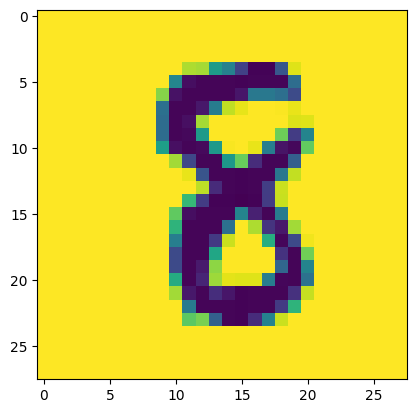

In [22]:
I = np.array(pd.read_csv('../Dataset/mnist_test.csv', header=None, sep=','), dtype=np.float32)

idx = np.argwhere(I[:, 0] == 8)
image = np.reshape(-I[idx[8], 1:], [28, 28])

image = np.array((image - image.min()) / (image.max() - image.min()))

print(image.shape)
plt.imshow(image)
plt.show()

In [23]:
I = np.array(pd.read_csv('../Dataset/mnist_test.csv', header=None, sep=','), dtype=np.float32)

idx = np.argwhere(I[:, 0] == 8)
image = np.reshape(-I[idx[8], 1:], [28, 28])

image = np.array((image - image.min()) / (image.max() - image.min()))

print(image.shape)
plt.imshow(image)
plt.show()

X = tf.Variable(initial_value=np.array(image, dtype=np.float32), trainable=True)
layer = CubicalLayer(homology_dimensions=[0])

lr = tf.keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate=1e-3, decay_steps=10, decay_rate=.01)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

losses, dgms = [], []
for epoch in tqdm(range(500+1)):
    with tf.GradientTape() as tape:
        dgm = layer.call(X)[0][0]
        persistence_loss = 10*tf.math.reduce_sum(tf.abs(dgm[:,1]-dgm[:,0]))
        loss = persistence_loss
        
    gradients = tape.gradient(loss, [X])
    
    np.random.seed(epoch)
    gradients[0] = gradients[0] + np.random.normal(loc=0., scale=.001, size=gradients[0].shape)
    
    optimizer.apply_gradients(zip(gradients, [X]))
    losses.append(loss.numpy())
    dgms.append(dgm)

100%|██████████| 501/501 [00:10<00:00, 46.06it/s]
